In [5]:
import os
import numpy as np
import pandas as pd
from facenet_pytorch import InceptionResnetV1
from PIL import Image
import torch
# Load pre-trained FaceNet model
facenet = InceptionResnetV1(pretrained='vggface2').eval()


In [3]:
image_paths = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder)]



In [27]:
# Load pre-trained FaceNet model
facenet = InceptionResnetV1(pretrained='vggface2').eval()

# Define a function to preprocess images
def preprocess_image(image):
    img = Image.open(image)
    img = img.resize((160, 160))  # FaceNet model input size
    img = np.array(img)
    return img



# Process each batch of 120 images from the folder
batch_size = 120
image_folder = r'E:\Projet 2023\Data\Faces_data\Micheal\23-03-2023-session-1-landmark-compare'

batch_number = 1
average_embedding_dict = {}  # Dictionary to store batch_number: average_embedding pairs

total_images_processed = 0

for batch_start in range(1, len(image_paths), batch_size):
    batch_end = batch_start + batch_size
    batch_image_paths = image_paths[batch_start:batch_end]
    
    batch_embeddings = []
    for image_path in batch_image_paths:
        img = preprocess_image(image_path)
        embedding = facenet(torch.tensor(img.transpose(2, 0, 1)).unsqueeze(0).float())
        batch_embeddings.append(embedding.detach().numpy().flatten())
        total_images_processed += 1
    
    batch_embedding_matrix = np.vstack(batch_embeddings)
    print(batch_embedding_matrix.shape)
    # Calculate the average vertically
    average_embedding = np.mean(batch_embedding_matrix, axis=0)
    print(average_embedding.shape)
    # Store the average_embedding along with the batch_number
    average_embedding_dict[batch_number] = average_embedding

    # Print progress
    print(f"Processed batch {batch_number}, Total images processed: {total_images_processed}")

    batch_number += 1

(120, 512)
(512,)
Processed batch 0, Total images processed: 120
(120, 512)
(512,)
Processed batch 1, Total images processed: 240
(120, 512)
(512,)
Processed batch 2, Total images processed: 360
(120, 512)
(512,)
Processed batch 3, Total images processed: 480
(120, 512)
(512,)
Processed batch 4, Total images processed: 600
(120, 512)
(512,)
Processed batch 5, Total images processed: 720
(120, 512)
(512,)
Processed batch 6, Total images processed: 840
(120, 512)
(512,)
Processed batch 7, Total images processed: 960
(120, 512)
(512,)
Processed batch 8, Total images processed: 1080
(120, 512)
(512,)
Processed batch 9, Total images processed: 1200
(120, 512)
(512,)
Processed batch 10, Total images processed: 1320
(120, 512)
(512,)
Processed batch 11, Total images processed: 1440
(120, 512)
(512,)
Processed batch 12, Total images processed: 1560
(120, 512)
(512,)
Processed batch 13, Total images processed: 1680
(120, 512)
(512,)
Processed batch 14, Total images processed: 1800
(120, 512)
(5

In [ ]:
tempo = average_embedding_dict

In [45]:
print(average_embedding_dict[1])

[ 5.47684506e-02 -3.41969319e-02  3.49330120e-02  1.13276718e-02
  5.01518138e-02 -4.91003357e-02 -1.34018119e-02 -2.17436049e-02
 -1.43030798e-02 -2.22573522e-02 -7.65166581e-02 -2.32037846e-02
 -8.74445066e-02 -1.99563224e-02  8.48576054e-02 -4.20279130e-02
  7.08312774e-03 -8.54833983e-03  2.45052893e-02  4.79232073e-02
  2.30262876e-02  3.58401984e-02 -2.57509928e-02  6.19008439e-03
  1.04191173e-02  1.59306005e-02  9.55577716e-02 -6.83981180e-03
  2.42734049e-02 -9.12557691e-02 -1.21526588e-02  4.86799069e-02
  1.79854799e-02  2.45503709e-02  6.45463169e-02  8.08695983e-03
 -6.45253956e-02  3.32425088e-02 -2.41857078e-02  3.22804563e-02
  3.51010502e-04 -2.65710475e-03 -4.19087196e-03 -1.18371218e-01
 -2.45402809e-02 -5.05690724e-02  3.99713442e-02 -2.38063857e-02
 -4.49620672e-02  3.97536121e-02  1.07786104e-01  6.83451146e-02
  5.07481582e-02  6.83176443e-02 -4.66707768e-03 -5.92211559e-02
  4.01559025e-02  7.28728324e-02 -1.90611125e-03  3.82848270e-02
 -2.40419414e-02 -7.90151

In [28]:

from sklearn.preprocessing import MinMaxScaler
excel_file_path = r'E:\Projet 2023\Data\Data Oximeter\23-03-2023\First session\Micheal\output.xlsx'
df = pd.read_excel(excel_file_path)
# Count the number of columns
# Perform min-max normalization for each column
scaler = MinMaxScaler()
# Count the number of columns
num_columns = df.shape[1]
print(num_columns)
# Exclude the batch number column if it exists
if num_columns > 1:
    data_to_normalize = df.iloc[:, 0:].values  # Exclude the first column (batch number)
    normalized_data = scaler.fit_transform(data_to_normalize)
    df.iloc[:, 0:] = normalized_data  # Update the DataFrame with normalized values
print(df)


77
   14:08 - 14:09  14:09 - 14:10  14:10 - 14:11  14:11 - 14:12  14:12 - 14:13  \
0        1.00000       1.000000       0.626639       0.391001       1.000000   
1        0.43512       0.706757       1.000000       0.000000       0.576923   
2        0.00000       0.406757       0.594203       0.501901       0.232999   
3        0.00000       0.079730       0.136646       1.000000       0.000000   
4        0.00000       0.127477       0.000000       0.957541       0.000000   
5        0.00000       0.000000       0.000000       0.957541       0.000000   
6        0.00000       0.000000       0.000000       0.957541       0.000000   

   14:13 - 14:14  14:14 - 14:15  14:15 - 14:16  14:16 - 14:17  14:17 - 14:18  \
0       0.237431       1.000000       0.791360       0.000000       1.000000   
1       0.000000       0.000000       0.610702       1.000000       0.000000   
2       0.554128       0.452352       0.195876       0.096603       0.554040   
3       0.798532       0.860676     

In [29]:
for batch_number, average_embedding in average_embedding_dict.items():
    normalized_columns = df.iloc[:,batch_number]
    
    average_embedding_with_normalized = np.concatenate([average_embedding, normalized_columns])
    average_embedding_dict[batch_number] = average_embedding_with_normalized

0    1.00000
1    0.43512
2    0.00000
3    0.00000
4    0.00000
5    0.00000
6    0.00000
Name: 14:08 - 14:09, dtype: float64
519
0    1.000000
1    0.706757
2    0.406757
3    0.079730
4    0.127477
5    0.000000
6    0.000000
Name: 14:09 - 14:10, dtype: float64
519
0    0.626639
1    1.000000
2    0.594203
3    0.136646
4    0.000000
5    0.000000
6    0.000000
Name: 14:10 - 14:11, dtype: float64
519
0    0.391001
1    0.000000
2    0.501901
3    1.000000
4    0.957541
5    0.957541
6    0.957541
Name: 14:11 - 14:12, dtype: float64
519
0    1.000000
1    0.576923
2    0.232999
3    0.000000
4    0.000000
5    0.000000
6    0.000000
Name: 14:12 - 14:13, dtype: float64
519
0    0.237431
1    0.000000
2    0.554128
3    0.798532
4    0.225321
5    1.000000
6    1.000000
Name: 14:13 - 14:14, dtype: float64
519
0    1.000000
1    0.000000
2    0.452352
3    0.860676
4    0.470446
5    0.037394
6    0.037394
Name: 14:14 - 14:15, dtype: float64
519
0    0.791360
1    0.610702
2    0.195876

In [33]:
print((average_embedding_dict[0]))

[ 5.29196672e-02 -2.60522421e-02  3.59192081e-02  1.63391139e-02
  5.27142435e-02 -4.54597250e-02 -1.42745543e-02 -1.39457304e-02
 -1.70806237e-02 -2.61217840e-02 -8.28871876e-02 -1.60972886e-02
 -8.90319198e-02 -1.29037881e-02  8.08697417e-02 -4.73149270e-02
  2.82987300e-03 -1.50192063e-02  2.63750572e-02  3.63616273e-02
  1.98813602e-02  3.63000967e-02 -3.30792218e-02  7.69406231e-03
  1.64931826e-02  9.30456258e-03  1.00252107e-01 -5.53838396e-03
  2.51252297e-02 -9.07298550e-02 -9.40454286e-03  4.39739712e-02
  2.58317236e-02  2.43573152e-02  5.65384030e-02  5.32740215e-03
 -7.08154440e-02  3.84678915e-02 -2.88639385e-02  3.02395634e-02
 -1.25218637e-03  5.40675968e-03 -1.76817237e-04 -1.13847964e-01
 -2.28036381e-02 -5.17260842e-02  3.65789197e-02 -1.99979432e-02
 -4.94535416e-02  3.42486128e-02  1.05277248e-01  7.34275058e-02
  5.90320751e-02  6.02990314e-02 -8.48296005e-03 -5.08724563e-02
  3.76567319e-02  7.68824667e-02 -3.64678795e-03  2.94492655e-02
 -2.42938045e-02 -7.53285

In [35]:
from sklearn.decomposition import PCA
# Create a matrix from the dictionary values
data_matrix = np.vstack(list(average_embedding_dict.values()))

# Perform PCA for dimensionality reduction
pca = PCA()
pca.fit(data_matrix)


PCA()

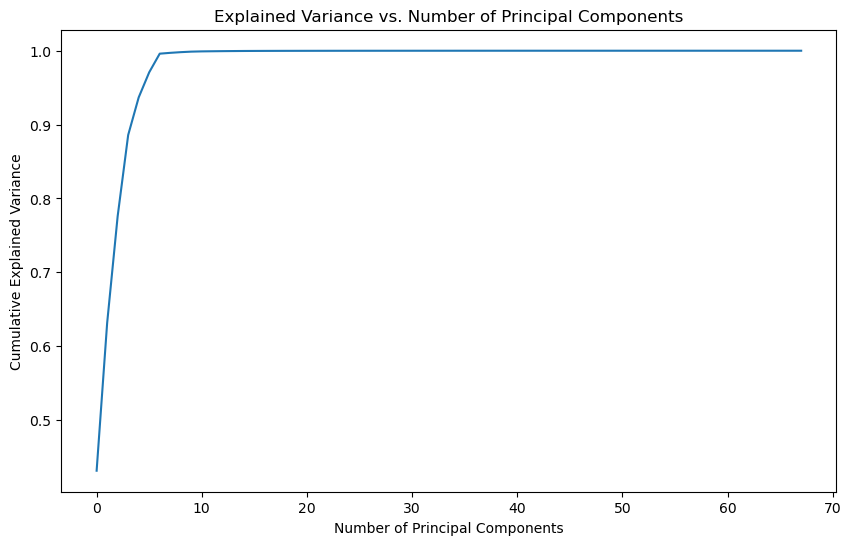

Optimal number of components (k) for PCA: 6


In [38]:
import matplotlib.pyplot as plt
#Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.show()

# Determine optimal k using the elbow method
explained_variance = pca.explained_variance_ratio_
total_variance = np.sum(explained_variance)
cumulative_variance = np.cumsum(explained_variance)
optimal_k = np.argmax(cumulative_variance >= 0.95 * total_variance) + 1
print(f"Optimal number of components (k) for PCA: {optimal_k}")


In [40]:
from sklearn.cluster import KMeans
# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_k)
cluster_labels = kmeans.fit_predict(data_matrix)


C:\Users\thanh\anaconda3\envs\deep-learning\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\thanh\anaconda3\envs\deep-learning\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [43]:
# Count occurrences of each label
label_counts = np.bincount(cluster_labels)
# Print the count of each label
for label, count in enumerate(label_counts):
    print(f"Cluster {label}: {count} samples")

Cluster 0: 10 samples
Cluster 1: 10 samples
Cluster 2: 9 samples
Cluster 3: 17 samples
Cluster 4: 9 samples
Cluster 5: 13 samples
